In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold
import missingno as msno
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [37]:
acc_data = pd.read_csv('additional_data.csv', sep = '\,', header = 0, engine = 'python')

#data = pd.read_html('additional_data.xls')

In [301]:
acc_data.head()
acc_data.to_csv('acc_data', index = False)

In [47]:
df = pd.read_csv('normalized_df')

In [54]:
df.head()

,ageGroup,gender,smoker,employed,sports,timeOfDay,testSuit,firstTask,arrival_car/motorcycle,arrival_public transport,...,panas_neg_t3,panas_neg_t4,borg_6mwt_pre,borg_6mwt_post,borg_sct_pre,borg_sct_post,6mwtask1,6mwtask2,sctask1,sctask2
0,1,0,0,1,1,1,0,1,0,1,...,0.000000,0.123457,0.090909,0.111111,0.500,0.777778,0.947368,0.928571,0.818182,0.684211
1,0,1,0,1,0,0,1,0,0,0,...,0.000000,0.000000,0.636364,0.777778,0.750,0.222222,0.526316,1.000000,0.772727,1.000000
2,0,0,0,1,1,0,1,1,1,0,...,0.104167,0.061728,0.636364,0.666667,1.000,0.777778,0.947368,1.000000,0.818182,1.000000
3,1,1,0,1,1,0,1,0,0,0,...,1.000000,1.000000,0.090909,0.000000,0.125,0.222222,0.894737,0.714286,1.000000,0.368421
4,1,1,0,0,1,1,0,1,1,0,...,0.000000,0.000000,0.454545,0.222222,0.875,0.333333,0.842105,1.000000,0.000000,0.263158


In [83]:
#Concatinate acc_data and df
df_final = pd.concat([df, acc_data], axis=1)
df_final.head()

,ageGroup,gender,smoker,employed,sports,timeOfDay,testSuit,firstTask,arrival_car/motorcycle,arrival_public transport,bmi,dist_6mwt,dist_sct,swe_b_t1,swe_b_t4,swe_m_t1,swe_m_t4,swe_f_t1,swe_f_t4,swe_a_t1,swe_a_t4,hee_t1,hee_t4,facts_t1,facts_t4,bsa_F,bsa_S,abi_p_vig,abi_p_kov,wkv_a_t1,wkv_a_t2,wkv_a_t3,wkv_a_t4,wkv_b_t1,wkv_b_t2,wkv_b_t3,wkv_b_t4,wkv_g_t1,wkv_g_t2,wkv_g_t3,wkv_g_t4,wkv_t_t1,wkv_t_t2,wkv_t_t3,wkv_t_t4,mood_v_t1,mood_v_t2,mood_v_t3,mood_v_t4,mood_c_t1,mood_c_t2,mood_c_t3,mood_c_t4,mood_ea_t1,mood_ea_t2,mood_ea_t3,mood_ea_t4,panas_pos_t1,panas_pos_t2,panas_pos_t3,panas_pos_t4,panas_neg_t1,panas_neg_t2,panas_neg_t3,panas_neg_t4,borg_6mwt_pre,borg_6mwt_post,borg_sct_pre,borg_sct_post,6mwtask1,6mwtask2,sctask1,sctask2,Minimum_of_smartphone_6mwt,Maximum_of_smartphone_6mwt,Deviation_of_smartphone_6mwt,Minimum_of_smartphone_sct,Maximum_of_smartphone_sct,Deviation_of_smartphone_sct,Minimum_of_fitbit_6mwt,Minimum_of_fitbit_6mwt.1,Deviation_of_fitbit_6mwt,amount_of_confidence_zero_in_6mwt,amount_of_confidence_one_in_6mwt,amount_of_confidence_two_in_6mwt,amount_of_confidence_three_in_6mwt,Minimum_of_fitbit_sct,Maximum_of_fitbit_6mwt,Deviation_of_fitbit_sct,amount_of_confidence_zero_in_sct,amount_of_confidence_one_in_sct,amount_of_confidence_two_in_sct,amount_of_confidence_three_in_sct,Maximum_of_accelerometer_6mwt_split1_v1,Minimum_of_accelerometer_6mwt_split1_v1,Deviation_of_accelerometer_6mwt_split1_v1,Maximum_of_accelerometer_6mwt_split2_v1,Minimum_of_accelerometer_6mwt_split2_v1,Deviation_of_accelerometer_6mwt_split2_v1,Maximum_of_accelerometer_6mwt_split3_v1,Minimum_of_accelerometer_6mwt_split3_v1,Deviation_of_accelerometer_6mwt_split3_v1,Maximum_of_accelerometer_6mwt_split4_v1,Minimum_of_accelerometer_6mwt_split4_v1,Deviation_of_accelerometer_6mwt_split4_v1,Maximum_of_accelerometer_6mwt_split1_v2,Minimum_of_accelerometer_6mwt_split1_v2,Deviation_of_accelerometer_6mwt_split1_v2,Maximum_of_accelerometer_6mwt_split2_v2,Minimum_of_accelerometer_6mwt_split2_v2,Deviation_of_accelerometer_6mwt_split2_v2,Maximum_of_accelerometer_6mwt_split3_v2,Minimum_of_accelerometer_6mwt_split3_v2,Deviation_of_accelerometer_6mwt_split3_v2,Maximum_of_accelerometer_6mwt_split4_v2,Minimum_of_accelerometer_6mwt_split4_v2,Deviation_of_accelerometer_6mwt_split4_v2,Maximum_of_accelerometer_6mwt_split1_v3,Minimum_of_accelerometer_6mwt_split1_v3,Deviation_of_accelerometer_6mwt_split1_v3,Maximum_of_accelerometer_6mwt_split2_v3,Minimum_of_accelerometer_6mwt_split2_v3,Deviation_of_accelerometer_6mwt_split2_v3,Maximum_of_accelerometer_6mwt_split3_v3,Minimum_of_accelerometer_6mwt_split3_v3,Deviation_of_accelerometer_6mwt_split3_v3,Maximum_of_accelerometer_6mwt_split4_v3,Minimum_of_accelerometer_6mwt_split4_v3,Deviation_of_accelerometer_6mwt_split4_v3,Maximum_of_accelerometer_sct_split1_v1,Minimum_of_accelerometer_sct_split1_v1,Deviation_of_accerometer_sct_split1_V1,Maximum_of_accelerometer_sct_split2_v1,Minimum_of_accelerometer_sct_split2_v1,Deviation_of_accerometer_sct_split2_V1,Maximum_of_accelerometer_sct_split1_v2,Minimum_of_accelerometer_sct_split1_v2,Deviation_of_accerometer_sct_split1_V2,Maximum_of_accelerometer_sct_split2_v2,Minimum_of_accelerometer_sct_split2_v2,Deviation_of_accerometer_sct_split2_V2,Maximum_of_accelerometer_sct_split1_v3,Minimum_of_accelerometer_sct_split1_v3,Deviation_of_accerometer_sct_split1_V3,Maximum_of_accelerometer_sct_split2_v3,Minimum_of_accelerometer_sct_split2_v3,Deviation_of_accerometer_sct_split2_V3
0,1,0,0,1,1,1,0,1,0,1,0.711864,0.083156,0.329114,0.632653,0.843137,0.642857,0.692308,0.578947,0.428571,1.0,1.0,0.882353,0.8750,0.120301,0.093023,0.247202,0.149632,0.499187,0.640244,1.00,1.00,1.000000,1.000000,1.000000,0.894737,0.727273,0.80,1.0000,1.000000,0.923077,1.0000,0.500000,0.652174,0.363636,0.60,0.588235,0.533333,0.500000,0.555556,0.266667,0.250000,0.142857,0.285714,0.4,0.545455,0.4,0.363636,0.316206,0.416667,0.264026,0.387821,0.098522,0.174419,0.000000,0.123457,0.090909,0.111111,0.500,0.777778,0.947368,0.928571

In [64]:
df_final.info(verbose='max_cols', memory_usage=None, max_cols=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 147 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   ageGroup                                   int64  
 1   gender                                     int64  
 2   smoker                                     int64  
 3   employed                                   int64  
 4   sports                                     int64  
 5   timeOfDay                                  int64  
 6   testSuit                                   int64  
 7   firstTask                                  int64  
 8   arrival_car/motorcycle                     int64  
 9   arrival_public transport                   int64  
 10  bmi                                        float64
 11  dist_6mwt                                  float64
 12  dist_sct                                   float64
 13  swe_b_t1                                   float64


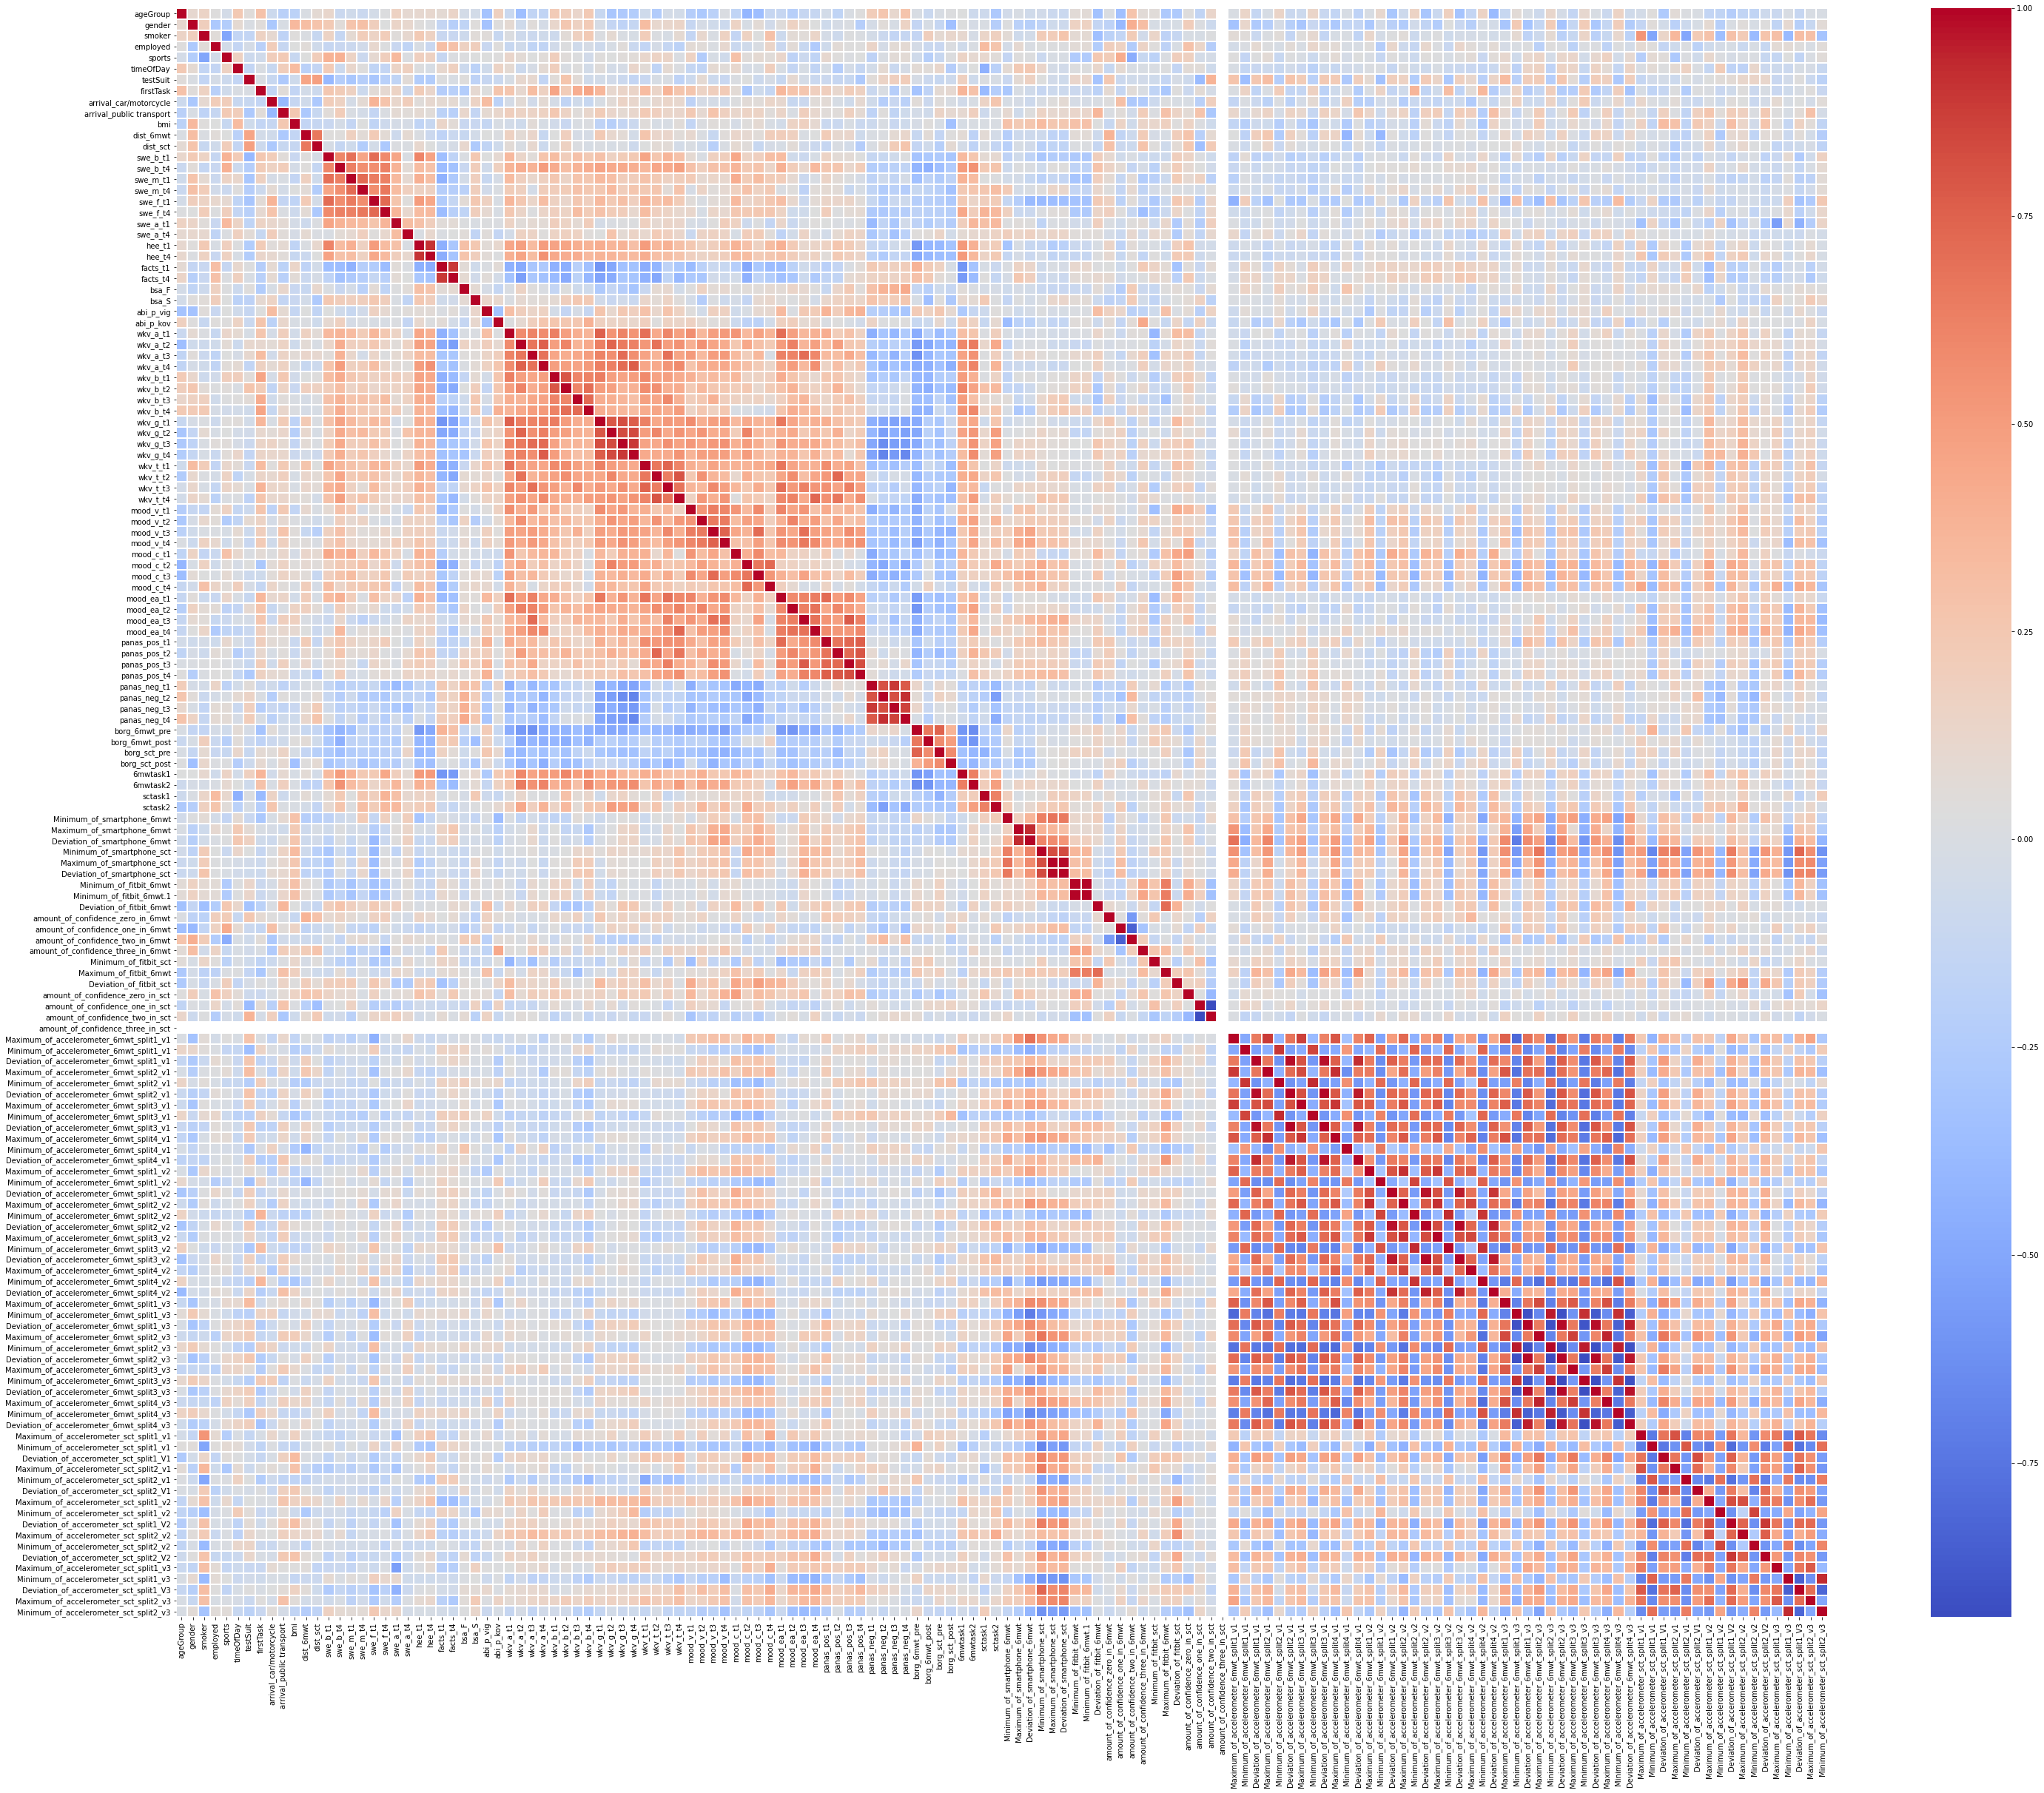

In [70]:
corr_table = df_final.corr(method='pearson')
plt.figure(figsize = (50,40))
sns.heatmap(corr_table, cmap = "coolwarm", linecolor = 'white', linewidth = 1)
plt.show()

In [171]:
#Just checking certain variables, not relevant
pd.set_option('display.max_rows', None, 'display.max_columns', None)
corr_table[abs(corr_table) > 0.5]['swe_b_t1']

ageGroup                                          NaN
gender                                            NaN
smoker                                            NaN
employed                                          NaN
sports                                            NaN
timeOfDay                                         NaN
testSuit                                          NaN
firstTask                                         NaN
arrival_car/motorcycle                            NaN
arrival_public transport                          NaN
bmi                                               NaN
dist_6mwt                                         NaN
dist_sct                                          NaN
swe_b_t1                                     1.000000
swe_b_t4                                     0.603463
swe_m_t1                                     0.691617
swe_m_t4                                          NaN
swe_f_t1                                     0.710151
swe_f_t4                    

In [85]:
from sklearn.preprocessing import MinMaxScaler
#documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
list_to_be_normalized = ['Minimum_of_smartphone_6mwt', 'Maximum_of_smartphone_6mwt', 'Deviation_of_smartphone_6mwt',
                         'Minimum_of_smartphone_sct', 'Maximum_of_smartphone_sct', 'Deviation_of_smartphone_sct',
                         'Minimum_of_fitbit_6mwt', 'Minimum_of_fitbit_6mwt.1', 'Deviation_of_fitbit_6mwt', 
                         'amount_of_confidence_zero_in_6mwt', 'amount_of_confidence_one_in_6mwt', 
                         'amount_of_confidence_two_in_6mwt', 'amount_of_confidence_three_in_6mwt', 
                         'Minimum_of_fitbit_sct', 'Maximum_of_fitbit_6mwt', 'Deviation_of_fitbit_sct', 
                         'amount_of_confidence_zero_in_sct', 'amount_of_confidence_one_in_sct', 
                         'amount_of_confidence_two_in_sct', 'amount_of_confidence_three_in_sct', 
                         'Maximum_of_accelerometer_6mwt_split1_v1', 'Minimum_of_accelerometer_6mwt_split1_v1', 
                         'Deviation_of_accelerometer_6mwt_split1_v1', 'Maximum_of_accelerometer_6mwt_split2_v1', 
                         'Minimum_of_accelerometer_6mwt_split2_v1', 'Deviation_of_accelerometer_6mwt_split2_v1', 
                         'Maximum_of_accelerometer_6mwt_split3_v1', 'Minimum_of_accelerometer_6mwt_split3_v1', 
                         'Deviation_of_accelerometer_6mwt_split3_v1', 'Maximum_of_accelerometer_6mwt_split4_v1', 
                         'Minimum_of_accelerometer_6mwt_split4_v1', 'Deviation_of_accelerometer_6mwt_split4_v1', 
                         'Maximum_of_accelerometer_6mwt_split1_v2', 'Minimum_of_accelerometer_6mwt_split1_v2', 
                         'Deviation_of_accelerometer_6mwt_split1_v2', 'Maximum_of_accelerometer_6mwt_split2_v2', 
                         'Minimum_of_accelerometer_6mwt_split2_v2', 'Deviation_of_accelerometer_6mwt_split2_v2', 
                         'Maximum_of_accelerometer_6mwt_split3_v2', 'Minimum_of_accelerometer_6mwt_split3_v2',
                         'Deviation_of_accelerometer_6mwt_split3_v2', 'Maximum_of_accelerometer_6mwt_split4_v2',
                         'Minimum_of_accelerometer_6mwt_split4_v2', 'Deviation_of_accelerometer_6mwt_split4_v2',
                         'Maximum_of_accelerometer_6mwt_split1_v3', 'Minimum_of_accelerometer_6mwt_split1_v3', 
                         'Deviation_of_accelerometer_6mwt_split1_v3', 'Maximum_of_accelerometer_6mwt_split2_v3',
                         'Minimum_of_accelerometer_6mwt_split2_v3', 'Deviation_of_accelerometer_6mwt_split2_v3', 
                         'Maximum_of_accelerometer_6mwt_split3_v3', 'Minimum_of_accelerometer_6mwt_split3_v3', 
                         'Deviation_of_accelerometer_6mwt_split3_v3', 'Maximum_of_accelerometer_6mwt_split4_v3', 
                         'Minimum_of_accelerometer_6mwt_split4_v3', 'Deviation_of_accelerometer_6mwt_split4_v3', 
                         'Maximum_of_accelerometer_sct_split1_v1', 'Minimum_of_accelerometer_sct_split1_v1', 
                         'Deviation_of_accerometer_sct_split1_V1', 'Maximum_of_accelerometer_sct_split2_v1', 
                         'Minimum_of_accelerometer_sct_split2_v1', 'Deviation_of_accerometer_sct_split2_V1',
                         'Maximum_of_accelerometer_sct_split1_v2', 'Minimum_of_accelerometer_sct_split1_v2', 
                         'Deviation_of_accerometer_sct_split1_V2', 'Maximum_of_accelerometer_sct_split2_v2', 
                         'Minimum_of_accelerometer_sct_split2_v2', 'Deviation_of_accerometer_sct_split2_V2', 
                         'Maximum_of_accelerometer_sct_split1_v3', 'Minimum_of_accelerometer_sct_split1_v3', 
                         'Deviation_of_accerometer_sct_split1_V3', 'Maximum_of_accelerometer_sct_split2_v3', 
                         'Minimum_of_accelerometer_sct_split2_v3', 'Deviation_of_accerometer_sct_split2_V3']
df_final[list_to_be_normalized] = pd.DataFrame(scaler.fit_transform(df_final[list_to_be_normalized]), columns=list_to_be_normalized)
df_final.head()


,ageGroup,gender,smoker,employed,sports,timeOfDay,testSuit,firstTask,arrival_car/motorcycle,arrival_public transport,bmi,dist_6mwt,dist_sct,swe_b_t1,swe_b_t4,swe_m_t1,swe_m_t4,swe_f_t1,swe_f_t4,swe_a_t1,swe_a_t4,hee_t1,hee_t4,facts_t1,facts_t4,bsa_F,bsa_S,abi_p_vig,abi_p_kov,wkv_a_t1,wkv_a_t2,wkv_a_t3,wkv_a_t4,wkv_b_t1,wkv_b_t2,wkv_b_t3,wkv_b_t4,wkv_g_t1,wkv_g_t2,wkv_g_t3,wkv_g_t4,wkv_t_t1,wkv_t_t2,wkv_t_t3,wkv_t_t4,mood_v_t1,mood_v_t2,mood_v_t3,mood_v_t4,mood_c_t1,mood_c_t2,mood_c_t3,mood_c_t4,mood_ea_t1,mood_ea_t2,mood_ea_t3,mood_ea_t4,panas_pos_t1,panas_pos_t2,panas_pos_t3,panas_pos_t4,panas_neg_t1,panas_neg_t2,panas_neg_t3,panas_neg_t4,borg_6mwt_pre,borg_6mwt_post,borg_sct_pre,borg_sct_post,6mwtask1,6mwtask2,sctask1,sctask2,Minimum_of_smartphone_6mwt,Maximum_of_smartphone_6mwt,Deviation_of_smartphone_6mwt,Minimum_of_smartphone_sct,Maximum_of_smartphone_sct,Deviation_of_smartphone_sct,Minimum_of_fitbit_6mwt,Minimum_of_fitbit_6mwt.1,Deviation_of_fitbit_6mwt,amount_of_confidence_zero_in_6mwt,amount_of_confidence_one_in_6mwt,amount_of_confidence_two_in_6mwt,amount_of_confidence_three_in_6mwt,Minimum_of_fitbit_sct,Maximum_of_fitbit_6mwt,Deviation_of_fitbit_sct,amount_of_confidence_zero_in_sct,amount_of_confidence_one_in_sct,amount_of_confidence_two_in_sct,amount_of_confidence_three_in_sct,Maximum_of_accelerometer_6mwt_split1_v1,Minimum_of_accelerometer_6mwt_split1_v1,Deviation_of_accelerometer_6mwt_split1_v1,Maximum_of_accelerometer_6mwt_split2_v1,Minimum_of_accelerometer_6mwt_split2_v1,Deviation_of_accelerometer_6mwt_split2_v1,Maximum_of_accelerometer_6mwt_split3_v1,Minimum_of_accelerometer_6mwt_split3_v1,Deviation_of_accelerometer_6mwt_split3_v1,Maximum_of_accelerometer_6mwt_split4_v1,Minimum_of_accelerometer_6mwt_split4_v1,Deviation_of_accelerometer_6mwt_split4_v1,Maximum_of_accelerometer_6mwt_split1_v2,Minimum_of_accelerometer_6mwt_split1_v2,Deviation_of_accelerometer_6mwt_split1_v2,Maximum_of_accelerometer_6mwt_split2_v2,Minimum_of_accelerometer_6mwt_split2_v2,Deviation_of_accelerometer_6mwt_split2_v2,Maximum_of_accelerometer_6mwt_split3_v2,Minimum_of_accelerometer_6mwt_split3_v2,Deviation_of_accelerometer_6mwt_split3_v2,Maximum_of_accelerometer_6mwt_split4_v2,Minimum_of_accelerometer_6mwt_split4_v2,Deviation_of_accelerometer_6mwt_split4_v2,Maximum_of_accelerometer_6mwt_split1_v3,Minimum_of_accelerometer_6mwt_split1_v3,Deviation_of_accelerometer_6mwt_split1_v3,Maximum_of_accelerometer_6mwt_split2_v3,Minimum_of_accelerometer_6mwt_split2_v3,Deviation_of_accelerometer_6mwt_split2_v3,Maximum_of_accelerometer_6mwt_split3_v3,Minimum_of_accelerometer_6mwt_split3_v3,Deviation_of_accelerometer_6mwt_split3_v3,Maximum_of_accelerometer_6mwt_split4_v3,Minimum_of_accelerometer_6mwt_split4_v3,Deviation_of_accelerometer_6mwt_split4_v3,Maximum_of_accelerometer_sct_split1_v1,Minimum_of_accelerometer_sct_split1_v1,Deviation_of_accerometer_sct_split1_V1,Maximum_of_accelerometer_sct_split2_v1,Minimum_of_accelerometer_sct_split2_v1,Deviation_of_accerometer_sct_split2_V1,Maximum_of_accelerometer_sct_split1_v2,Minimum_of_accelerometer_sct_split1_v2,Deviation_of_accerometer_sct_split1_V2,Maximum_of_accelerometer_sct_split2_v2,Minimum_of_accelerometer_sct_split2_v2,Deviation_of_accerometer_sct_split2_V2,Maximum_of_accelerometer_sct_split1_v3,Minimum_of_accelerometer_sct_split1_v3,Deviation_of_accerometer_sct_split1_V3,Maximum_of_accelerometer_sct_split2_v3,Minimum_of_accelerometer_sct_split2_v3,Deviation_of_accerometer_sct_split2_V3
0,1,0,0,1,1,1,0,1,0,1,0.711864,0.083156,0.329114,0.632653,0.843137,0.642857,0.692308,0.578947,0.428571,1.0,1.0,0.882353,0.8750,0.120301,0.093023,0.247202,0.149632,0.499187,0.640244,1.00,1.00,1.000000,1.000000,1.000000,0.894737,0.727273,0.80,1.0000,1.000000,0.923077,1.0000,0.500000,0.652174,0.363636,0.60,0.588235,0.533333,0.500000,0.555556,0.266667,0.250000,0.142857,0.285714,0.4,0.545455,0.4,0.363636,0.316206,0.416667,0.264026,0.387821,0.098522,0.174419,0.000000,0.123457,0.090909,0.111111,0.500,0.777778,0.947368,0.928571

In [170]:
len(list_to_be_normalized)

74

In [275]:
#General automated approach for removal of highly correlated features
#Treshold = 0.5
#Clone the dataset
df1 = df_final.copy()

#Create a correlation matrix
corr_df = df1.corr().abs()

#Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype = bool))
tri_df = corr_df.mask(mask)

#Find columns that meet treshold
to_drop = [x for x in tri_df.columns if any (tri_df[x]>0.5)]
print(to_drop)
len(to_drop)

['smoker', 'dist_6mwt', 'swe_b_t1', 'swe_b_t4', 'swe_m_t1', 'swe_m_t4', 'swe_f_t1', 'swe_a_t1', 'hee_t1', 'hee_t4', 'facts_t1', 'facts_t4', 'wkv_a_t1', 'wkv_a_t2', 'wkv_a_t3', 'wkv_a_t4', 'wkv_b_t1', 'wkv_b_t2', 'wkv_b_t3', 'wkv_b_t4', 'wkv_g_t1', 'wkv_g_t2', 'wkv_g_t3', 'wkv_g_t4', 'wkv_t_t1', 'wkv_t_t2', 'wkv_t_t3', 'wkv_t_t4', 'mood_v_t1', 'mood_v_t2', 'mood_v_t3', 'mood_v_t4', 'mood_c_t1', 'mood_c_t2', 'mood_c_t3', 'mood_ea_t1', 'mood_ea_t2', 'mood_ea_t3', 'mood_ea_t4', 'panas_pos_t1', 'panas_pos_t2', 'panas_pos_t3', 'panas_neg_t1', 'panas_neg_t2', 'panas_neg_t3', 'borg_6mwt_pre', 'borg_6mwt_post', 'borg_sct_pre', '6mwtask1', 'sctask1', 'Minimum_of_smartphone_6mwt', 'Maximum_of_smartphone_6mwt', 'Deviation_of_smartphone_6mwt', 'Minimum_of_smartphone_sct', 'Maximum_of_smartphone_sct', 'Deviation_of_smartphone_sct', 'Minimum_of_fitbit_6mwt', 'Minimum_of_fitbit_6mwt.1', 'Deviation_of_fitbit_6mwt', 'amount_of_confidence_zero_in_6mwt', 'amount_of_confidence_one_in_6mwt', 'Maximum_of_fit

116

In [276]:
#We drop 116 variables 
df1.drop(to_drop, axis = 1, inplace = True)

In [277]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ageGroup                                   42 non-null     int64  
 1   gender                                     42 non-null     int64  
 2   employed                                   42 non-null     int64  
 3   sports                                     42 non-null     int64  
 4   timeOfDay                                  42 non-null     int64  
 5   testSuit                                   42 non-null     int64  
 6   firstTask                                  42 non-null     int64  
 7   arrival_car/motorcycle                     42 non-null     int64  
 8   arrival_public transport                   42 non-null     int64  
 9   bmi                                        42 non-null     float64
 10  dist_sct                    

In [283]:
#Apply PCA
pca = PCA(n_components=2)
pca.fit(df1)
x_pca = pca.transform(df1)
x_pca.shape
x_pca

df1_pca = pd.DataFrame(x_pca,columns=['pca1', 'pca2'])

#Explained variance 
print('Explained variance:')
print(pca.explained_variance_)
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)
print('Cumulative sum:')
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance:
[0.49524523 0.37378222]
Explained variance ratio:
[0.15442925 0.11655419]
Cumulative sum:
[0.15442925 0.27098345]


In [181]:
#Apply Gaussian mixture clustering
#Look for optimal number of clusters
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(df1_pca)
    df1_pca['Cluster'] = gmm.predict(df1_pca)
    d = metrics.silhouette_score(df1_pca, df1_pca['Cluster'], metric='euclidean')
    print(i, d)    

2 0.48233080515287297
3 0.5683561611653214
4 0.5832963872851021
5 0.6159384303585174
6 0.6309536449639401
7 0.6667945174877188
8 0.7112140835497124
9 0.7183555515585477
10 0.7112492480718116


Text(0.5, 1.0, 'Gaussian mixture on PCA')

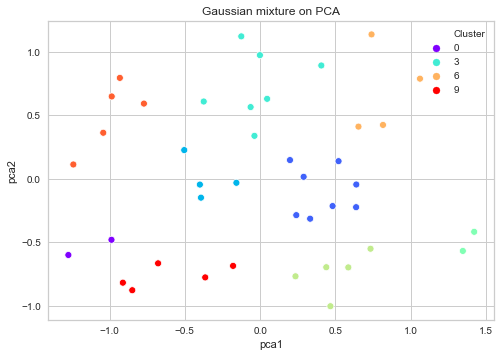

In [182]:
#Seems like 9 must be the case, let's try 9 and 2
gmm = GaussianMixture(n_components=9)
gmm.fit(df1_pca.drop('Cluster', axis = 1))
df1_pca['Cluster'] = gmm.predict(df1_pca.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df1_pca, palette = 'rainbow')
ax.set_title('Gaussian mixture on PCA')

Text(0.5, 1.0, 'Gaussian mixture on PCA')

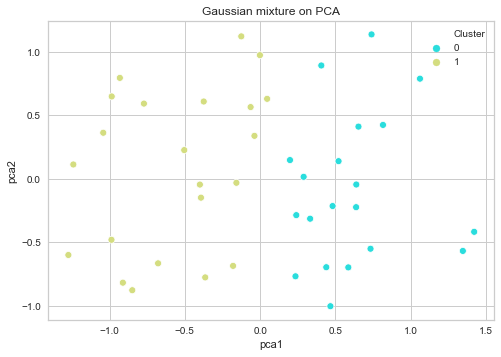

In [187]:
gmm = GaussianMixture(n_components=2)
gmm.fit(df1_pca.drop('Cluster', axis = 1))
df1_pca['Cluster'] = gmm.predict(df1_pca.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df1_pca, palette = 'rainbow')
ax.set_title('Gaussian mixture on PCA')

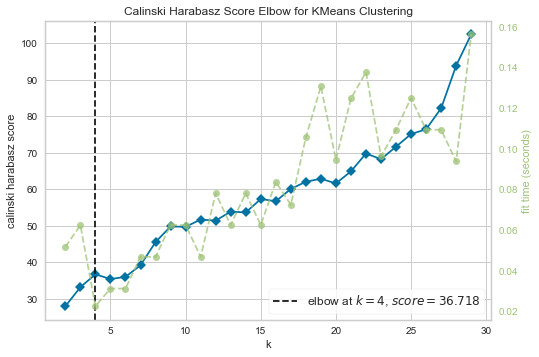

In [193]:
#Hierarchical clustering
# Calinski Harabasz Score for finding an optimal number
#of clusters (we adapt one for k means)
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(df1_pca)        # Fit the data to the visualizer
visualizer.show()

Text(0.5, 1.0, 'Agglomerative Clustering on PCA')

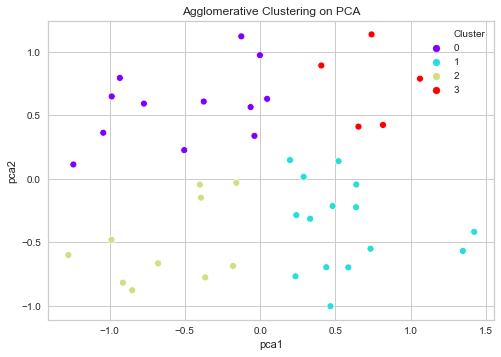

In [198]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg.fit_predict(df1_pca)
df1_pca['Cluster'] = agg.labels_
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df1_pca, palette = 'rainbow')
ax.set_title('Agglomerative Clustering on PCA')

Text(0.5, 1.0, 'K-Means on PCA')

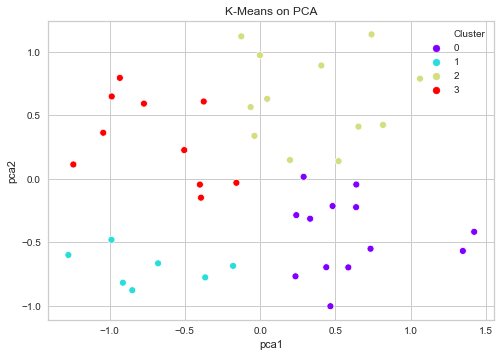

In [200]:
#K-Means
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit(df1_pca.drop('Cluster', axis = 1))
df1_pca['Cluster'] = km.labels_
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df1_pca, palette = 'rainbow')
ax.set_title('K-Means on PCA')   

In [284]:
#Let's try with PCA with 3 components
#Apply PCA
pca = PCA(n_components=3)
pca.fit(df1)
x_pca = pca.transform(df1)
x_pca.shape
x_pca

df1_pca = pd.DataFrame(x_pca,columns=['pca1', 'pca2', 'pca3'])

#Explained variance 
print('Explained variance:')
print(pca.explained_variance_)
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)
print('Cumulative sum:')
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance:
[0.49524523 0.37378222 0.33009106]
Explained variance ratio:
[0.15442925 0.11655419 0.10293025]
Cumulative sum:
[0.15442925 0.27098345 0.3739137 ]


In [202]:
#Apply Gaussian mixture clustering
#Look for optimal number of clusters
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(df1_pca)
    df1_pca['Cluster'] = gmm.predict(df1_pca)
    d = metrics.silhouette_score(df1_pca, df1_pca['Cluster'], metric='euclidean')
    print(i, d) 

2 0.37625474082019517
3 0.34464066149165906
4 0.45545092187241804
5 0.44520886888491706
6 0.5144453149525988
7 0.509074541513083
8 0.5686015558415722
9 0.5528764029021696
10 0.5774287914628754


Text(0.5, 0.92, 'Gaussian mixture on PCA')

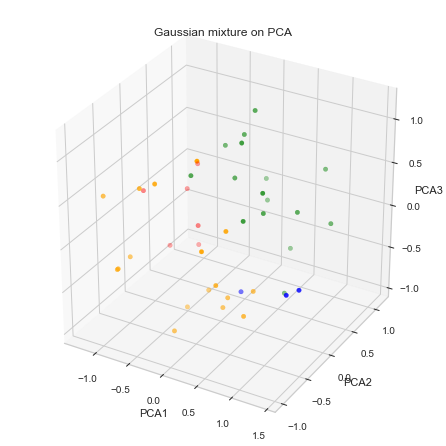

In [215]:
#The first kick at 4, so optimal number = 4
gmm = GaussianMixture(n_components=4)
gmm.fit(df1_pca)
df1_pca['Cluster'] = gmm.predict(df1_pca)


#plot 3D graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig)
x = df1_pca['pca1']
y = df1_pca['pca2']
z = df1_pca['pca3']
colors = ['blue', 'green', 'red', 'orange']
df1_pca['c'] = df1_pca.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
ax.scatter(x, y, z, c  = df1_pca['c'])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Gaussian mixture on PCA')

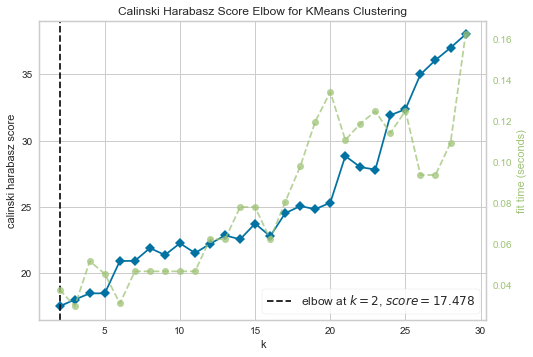

In [216]:
#Hierarchical clustering
# Calinski Harabasz Score for finding an optimal number
#of clusters (we adapt one for k means)
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(df1_pca.drop(['Cluster', 'c'], axis =1))        # Fit the data to the visualizer
visualizer.show()

Text(0.5, 0.92, 'Agglomerative Clustering on PCA')

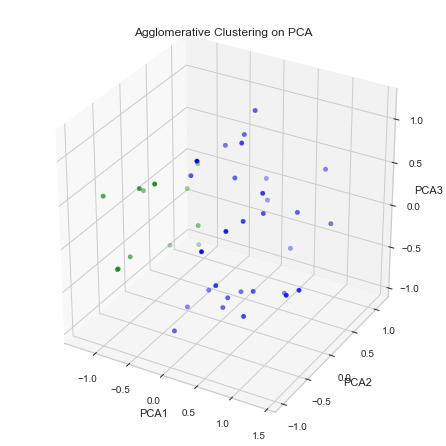

In [225]:
#Agglomerative clustering
#optimal number = 2
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg.fit_predict(df1_pca)
df1_pca['Cluster'] = agg.labels_

#plot 3d graph

fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig)
x = df1_pca['pca1']
y = df1_pca['pca2']
z = df1_pca['pca3']
colors = ['blue', 'green']
df1_pca['c'] = df1_pca.Cluster.map({0:colors[0], 1:colors[1]})
ax.scatter(x, y, z, c  = df1_pca['c'])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Agglomerative Clustering on PCA')

In [ ]:
#No good visibility -> no additional information
#Let's try with Isomap

In [228]:
#Isomap: non-linear dimensionality reduction
from sklearn import manifold
#just copy of my set for convenience:
df2 = df1.copy()

iso = manifold.Isomap(n_neighbors=5, n_components=2)
iso.fit(df2)
manifold_2Da = iso.transform(df2)
mani_df = pd.DataFrame(manifold_2Da, columns=['c1', 'c2'])

In [229]:
#Compute the reconstruction error for the embedding.
iso.reconstruction_error()

3.625458068532714

In [230]:
#Apply Gaussian mixture clustering
#Look for optimal number of clusters
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(mani_df)
    mani_df['Cluster'] = gmm.predict(mani_df)
    d = metrics.silhouette_score(mani_df, mani_df['Cluster'], metric='euclidean')
    print(i, d)  

2 0.31414127475694875
3 0.3141412747569488
4 0.37982816352610616
5 0.42815832098938794
6 0.5333115428347149
7 0.4962158372879428
8 0.4869430719391064
9 0.6349063271378164
10 0.6096770087768894


Text(0.5, 1.0, 'Gaussian mixture on Isomap')

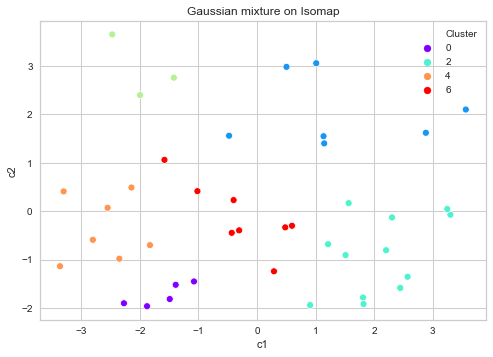

In [231]:
#6 seems to be optimal, let's try 6 and 2
gmm = GaussianMixture(n_components=6)
gmm.fit(mani_df.drop('Cluster', axis = 1))
mani_df['Cluster'] = gmm.predict(mani_df.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('Gaussian mixture on Isomap')


Text(0.5, 1.0, 'Gaussian mixture on Isomap')

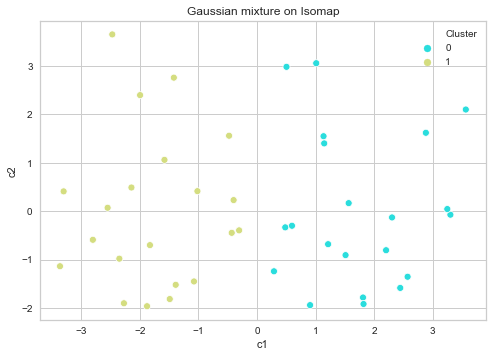

In [232]:
gmm = GaussianMixture(n_components=2)
gmm.fit(mani_df.drop('Cluster', axis = 1))
mani_df['Cluster'] = gmm.predict(mani_df.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('Gaussian mixture on Isomap')

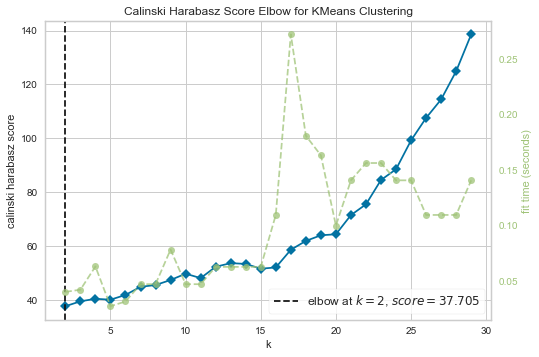

In [234]:
#Hierarchical clustering
# Calinski Harabasz Score for finding an optimal number
#of clusters (we adapt one for k means)
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(mani_df)        # Fit the data to the visualizer
visualizer.show()

Text(0.5, 1.0, 'Agglomerative Clustering on Isomap')

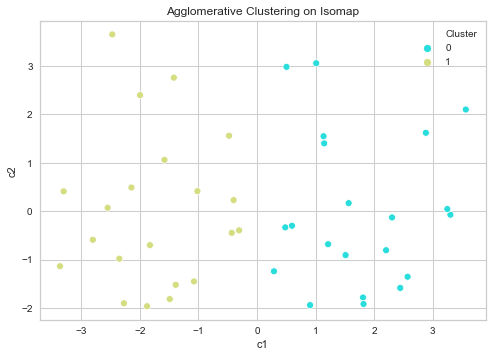

In [239]:
#2 - is optimal
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg.fit_predict(mani_df)
mani_df['Cluster'] = agg.labels_
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('Agglomerative Clustering on Isomap')

Text(0.5, 1.0, 'K-Means on Isomap')

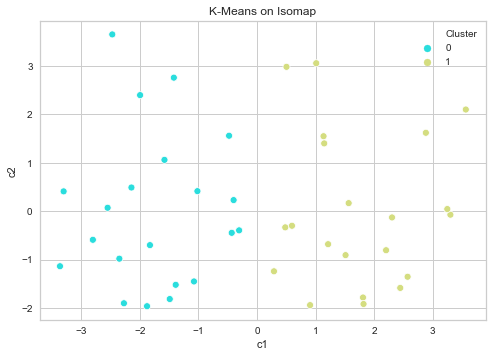

In [240]:
#Looks the same, continue with k-Means
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit(mani_df.drop('Cluster', axis = 1))
mani_df['Cluster'] = km.labels_
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('K-Means on Isomap')

In [ ]:
#We checked semi-automatically cleaned data, they provide stable results with Isomap, 
#and rather unstable with PCA.
#Now let's be more accurate, set our correlation treshold at 0.9 instead of 0.2

In [268]:
df3 = df_final.copy()

#Create a correlation matrix
corr_df = df3.corr().abs()

#Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype = bool))
tri_df = corr_df.mask(mask)

#Find columns that meet treshold
to_drop = [x for x in tri_df.columns if any (tri_df[x]>0.9)]
print(to_drop)
len(to_drop)

['hee_t1', 'panas_neg_t2', 'Maximum_of_smartphone_6mwt', 'Maximum_of_smartphone_sct', 'Minimum_of_fitbit_6mwt', 'amount_of_confidence_one_in_sct', 'Deviation_of_accelerometer_6mwt_split1_v1', 'Maximum_of_accelerometer_6mwt_split2_v1', 'Minimum_of_accelerometer_6mwt_split2_v1', 'Deviation_of_accelerometer_6mwt_split2_v1', 'Deviation_of_accelerometer_6mwt_split3_v1', 'Maximum_of_accelerometer_6mwt_split1_v2', 'Deviation_of_accelerometer_6mwt_split1_v2', 'Maximum_of_accelerometer_6mwt_split2_v2', 'Minimum_of_accelerometer_6mwt_split2_v2', 'Deviation_of_accelerometer_6mwt_split2_v2', 'Minimum_of_accelerometer_6mwt_split3_v2', 'Deviation_of_accelerometer_6mwt_split3_v2', 'Minimum_of_accelerometer_6mwt_split1_v3', 'Deviation_of_accelerometer_6mwt_split1_v3', 'Maximum_of_accelerometer_6mwt_split2_v3', 'Minimum_of_accelerometer_6mwt_split2_v3', 'Deviation_of_accelerometer_6mwt_split2_v3', 'Minimum_of_accelerometer_6mwt_split3_v3', 'Deviation_of_accelerometer_6mwt_split3_v3', 'Minimum_of_accele

26

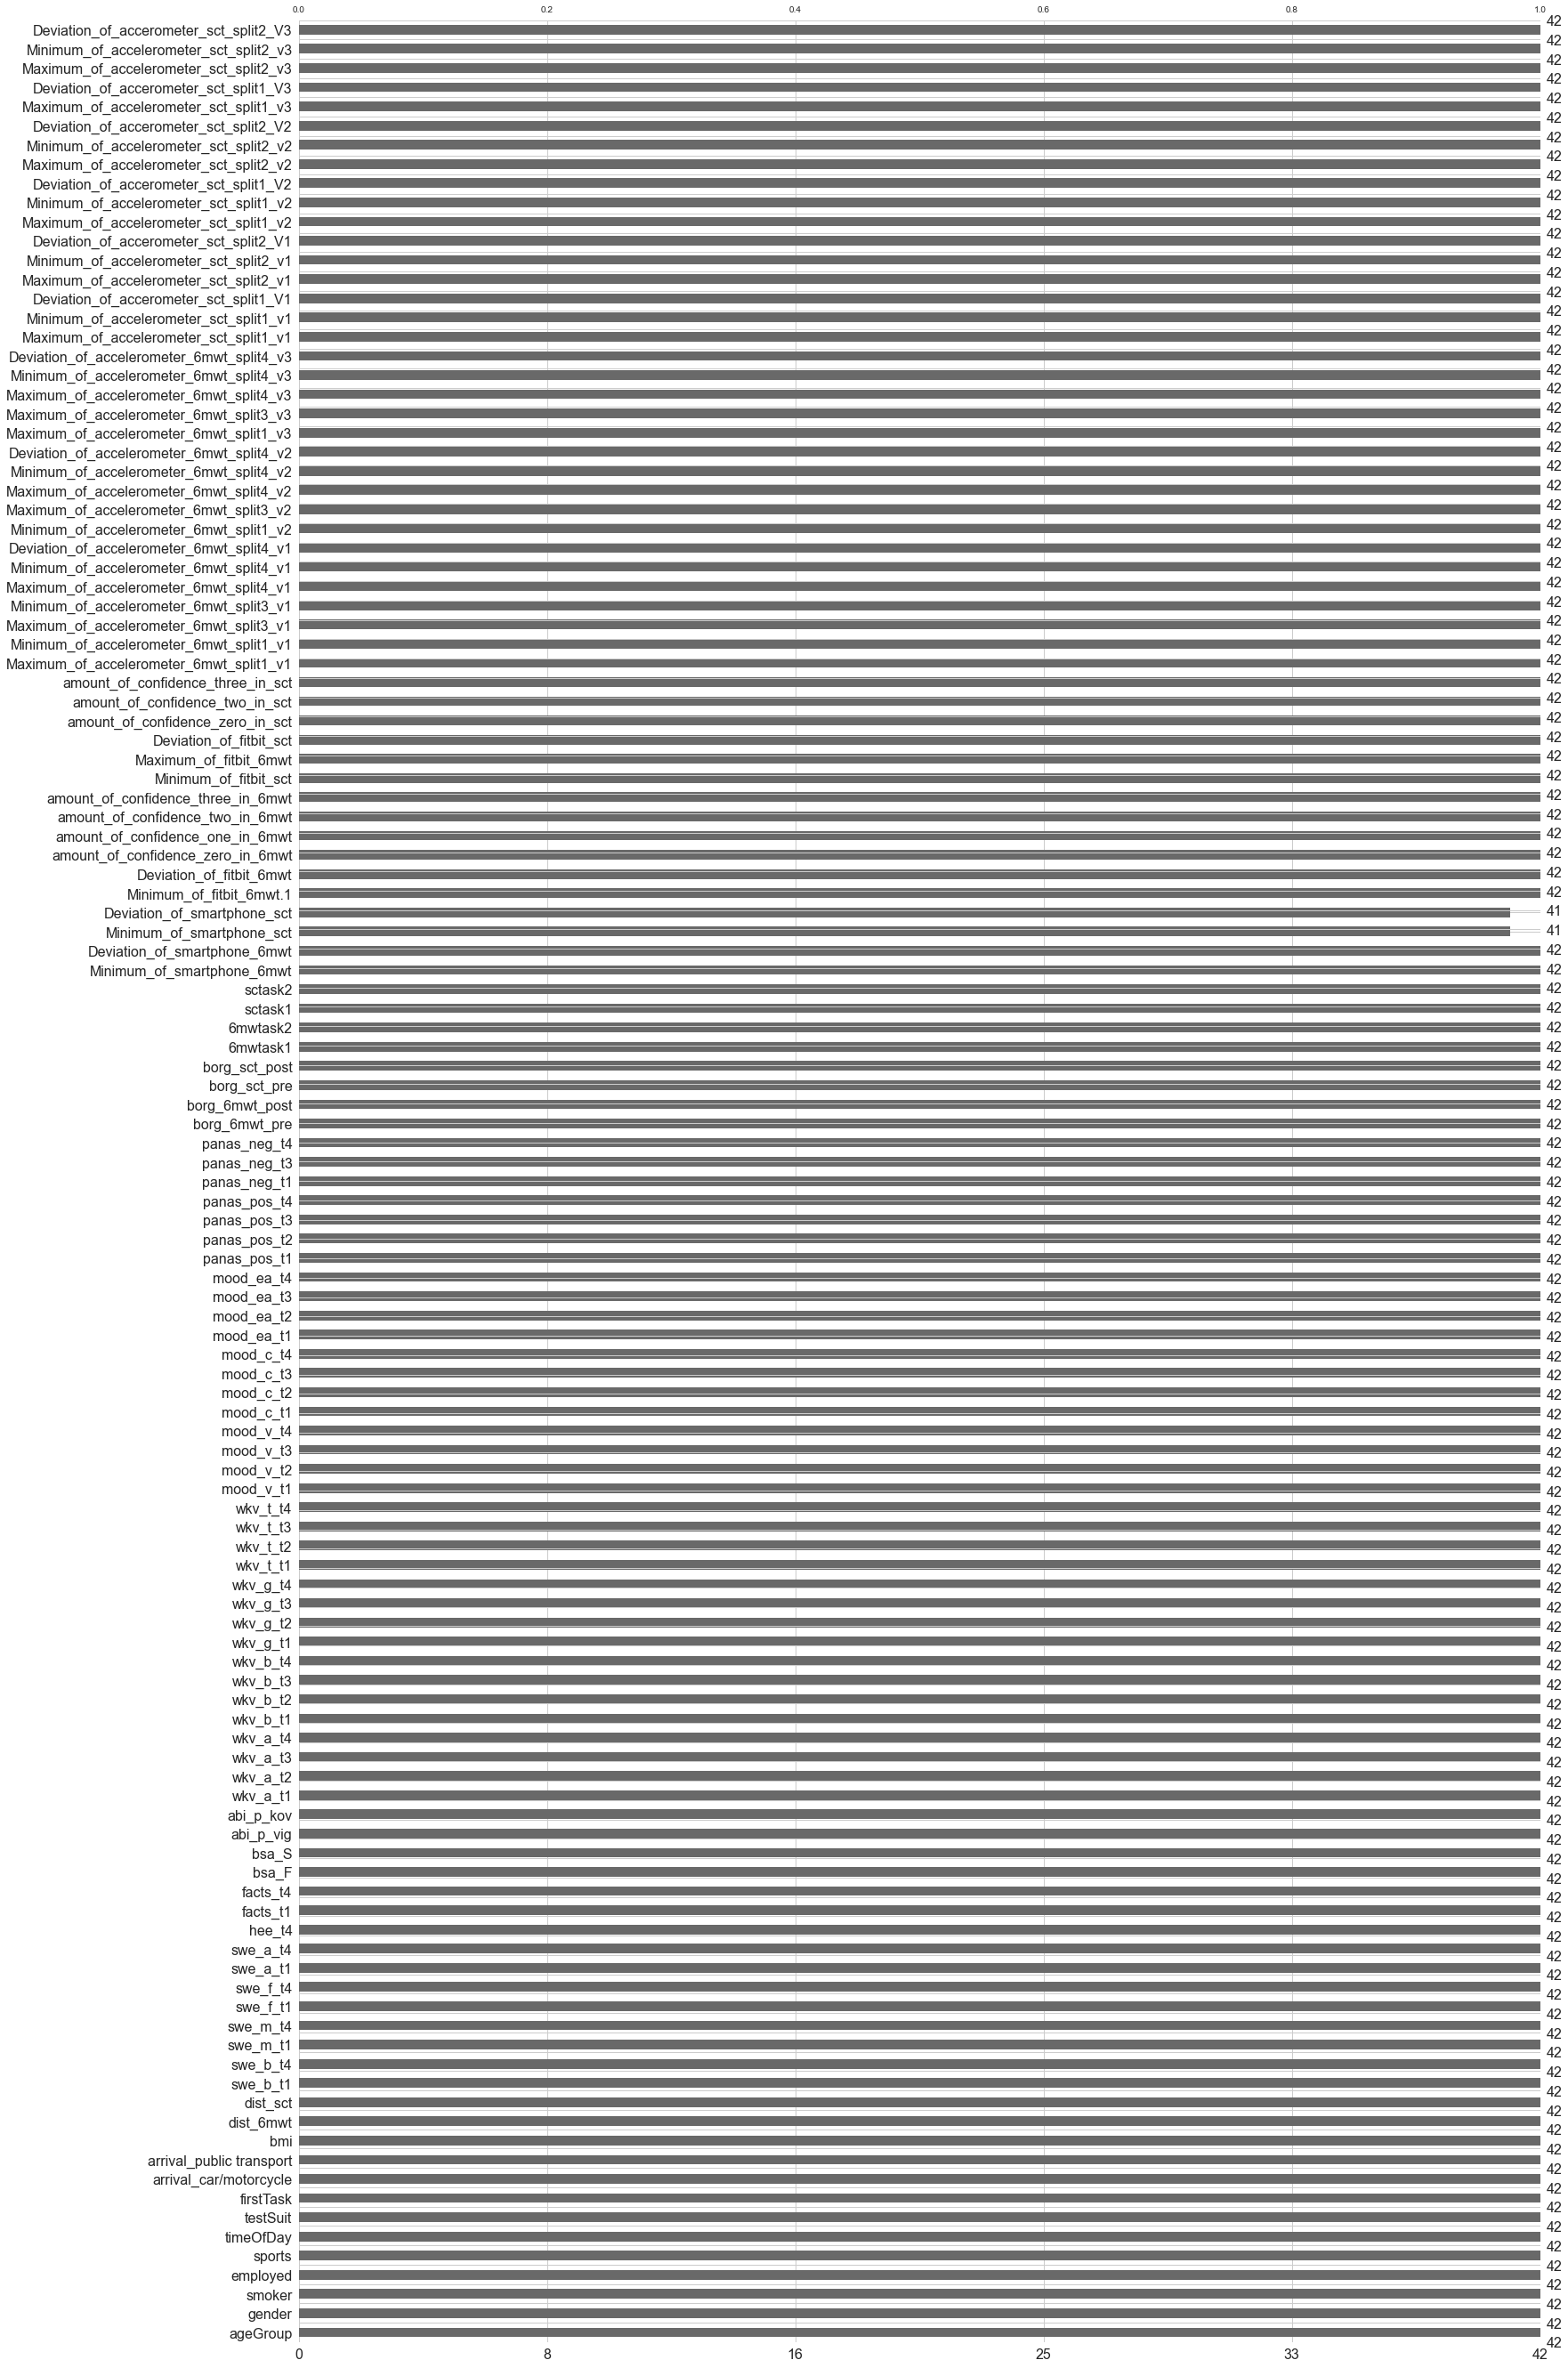

In [269]:
#We drop 26 variables 
df3.drop(to_drop, axis = 1, inplace = True)
msno.bar(df3)

In [270]:
df3.drop(['Deviation_of_smartphone_sct', 'Minimum_of_smartphone_sct'],
         axis = 1, inplace = True)


In [285]:
#Apply PCA
pca = PCA(n_components=2)
pca.fit(df3)
x_pca = pca.transform(df3)
x_pca.shape
x_pca

df3_pca = pd.DataFrame(x_pca,columns=['pca1', 'pca2'])

#Explained variance 
print('Explained variance:')
print(pca.explained_variance_)
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)
print('Cumulative sum:')
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance:
[1.34263129 0.79269081]
Explained variance ratio:
[0.16441409 0.09707024]
Cumulative sum:
[0.16441409 0.26148433]


In [286]:
#Gaussian mixture method
#Look for optimal number of clusters
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(df3_pca)
    df3_pca['Cluster'] = gmm.predict(df3_pca)
    d = metrics.silhouette_score(df3_pca, df3_pca['Cluster'], metric='euclidean')
    print(i, d)

2 0.40323349863713903
3 0.3713740054924178
4 0.5428685229578052
5 0.5392384509067407
6 0.5845738609615165
7 0.623764101848653
8 0.5800524406701759
9 0.6576587467939263
10 0.6827769208936961


Text(0.5, 1.0, 'Gaussian mixture on PCA')

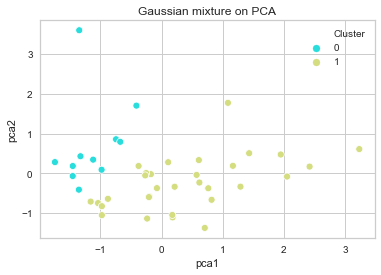

In [287]:
#2 is optimal
gmm = GaussianMixture(n_components=2)
gmm.fit(df3_pca.drop('Cluster', axis = 1))
df3_pca['Cluster'] = gmm.predict(df3_pca.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df3_pca, palette = 'rainbow')
ax.set_title('Gaussian mixture on PCA')

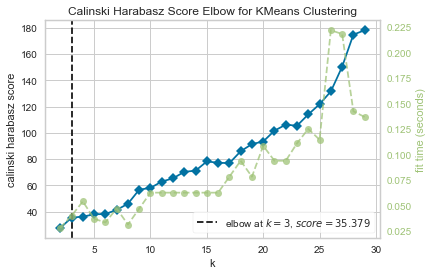

In [288]:
#Hierarchical clustering
# Calinski Harabasz Score for finding an optimal number
#of clusters (we adapt one for k means)
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(df3_pca)        # Fit the data to the visualizer
visualizer.show()

Text(0.5, 1.0, 'Agglomerative Clustering on PCA')

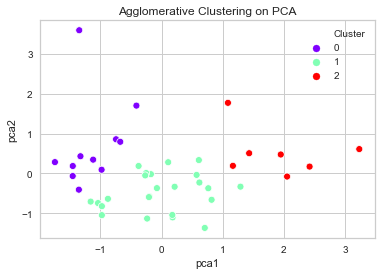

In [289]:
#Optimal number is 3, let's try both 2 and 3
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit_predict(df3_pca)
df3_pca['Cluster'] = agg.labels_
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df3_pca, palette = 'rainbow')
ax.set_title('Agglomerative Clustering on PCA')

Text(0.5, 1.0, 'Agglomerative Clustering on PCA')

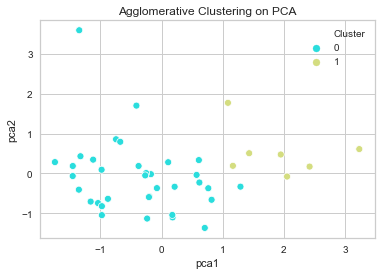

In [290]:
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg.fit_predict(df3_pca)
df3_pca['Cluster'] = agg.labels_
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df3_pca, palette = 'rainbow')
ax.set_title('Agglomerative Clustering on PCA')

Text(0.5, 1.0, 'K-Means on PCA')

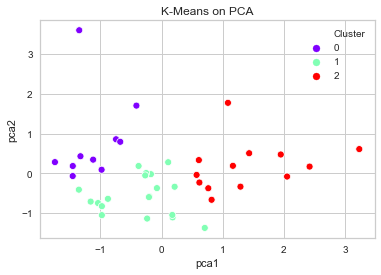

In [291]:
#K-Means
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit(df3_pca.drop('Cluster', axis = 1))
df3_pca['Cluster'] = km.labels_
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df3_pca, palette = 'rainbow')
ax.set_title('K-Means on PCA') 

Text(0.5, 1.0, 'K-Means on PCA')

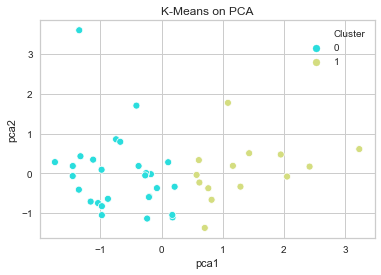

In [292]:
#K-Means
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit(df3_pca.drop('Cluster', axis = 1))
df3_pca['Cluster'] = km.labels_
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df3_pca, palette = 'rainbow')
ax.set_title('K-Means on PCA') 

In [293]:
#Now, let's try Isomap
#Isomap: non-linear dimensionality reduction
#just copy of my set for convenience:
df4 = df3.copy()
iso = manifold.Isomap(n_neighbors=5, n_components=2)
iso.fit(df4)
manifold_2Da = iso.transform(df4)
mani_df = pd.DataFrame(manifold_2Da, columns=['c1', 'c2'])

In [294]:
#Compute the reconstruction error for the embedding.
iso.reconstruction_error()

7.6771359790933635

In [ ]:
#Error becomes higher!

In [295]:
#Apply Gaussian mixture clustering
#Look for optimal number of clusters
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(mani_df)
    mani_df['Cluster'] = gmm.predict(mani_df)
    d = metrics.silhouette_score(mani_df, mani_df['Cluster'], metric='euclidean')
    print(i, d)  

2 0.40840813475734955
3 0.3242172287686644
4 0.30543026026320547
5 0.3564665977841517
6 0.3319956484940861
7 0.3423866353880965
8 0.5280680611983718
9 0.49899103314079046
10 0.5756920859433642


Text(0.5, 1.0, 'Gaussian mixture on Isomap')

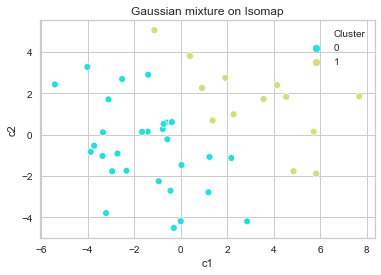

In [297]:
#2 is optimal
gmm = GaussianMixture(n_components=2)
gmm.fit(mani_df.drop('Cluster', axis = 1))
mani_df['Cluster'] = gmm.predict(mani_df.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('Gaussian mixture on Isomap')

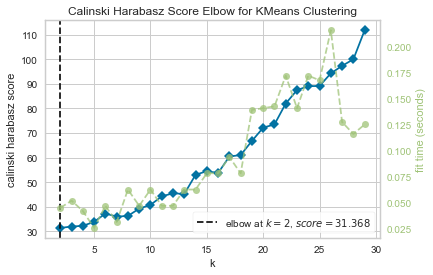

In [298]:
#Hierarchical clustering
# Calinski Harabasz Score for finding an optimal number
#of clusters (we adapt one for k means)
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(mani_df)        # Fit the data to the visualizer
visualizer.show()

Text(0.5, 1.0, 'Agglomerative Clustering on Isomap')

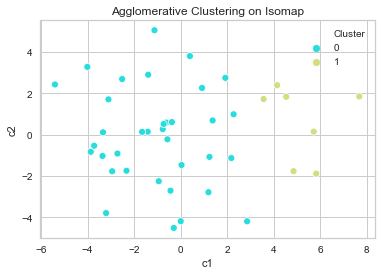

In [299]:
#2 is optimal
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg.fit_predict(mani_df)
mani_df['Cluster'] = agg.labels_
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('Agglomerative Clustering on Isomap')

Text(0.5, 1.0, 'K-Means on Isomap')

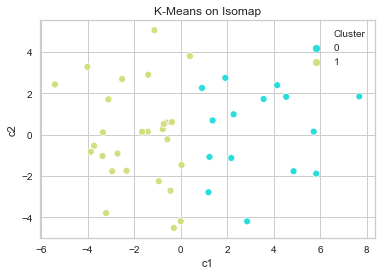

In [300]:
#Looks differently, let's try k-Means
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit(mani_df.drop('Cluster', axis = 1))
mani_df['Cluster'] = km.labels_
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('K-Means on Isomap')

In [ ]:
#From here, the old code is shown to see the difference with results from the complete set 
#containing the correlated features.  

In [242]:
#Find the highly correlated features (let us set 0.9 for now)
correlated_features = set()
correlation_matrix = df_final.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)
len(correlated_features)

{'amount_of_confidence_two_in_sct', 'Maximum_of_accelerometer_6mwt_split3_v2', 'Minimum_of_accelerometer_6mwt_split3_v1', 'Deviation_of_accelerometer_6mwt_split4_v2', 'Minimum_of_accelerometer_6mwt_split3_v3', 'Minimum_of_accelerometer_6mwt_split4_v2', 'Deviation_of_smartphone_sct', 'Deviation_of_accelerometer_6mwt_split1_v3', 'Deviation_of_accelerometer_6mwt_split2_v3', 'Deviation_of_accelerometer_6mwt_split3_v1', 'Maximum_of_accelerometer_6mwt_split4_v3', 'Minimum_of_fitbit_6mwt.1', 'Deviation_of_accelerometer_6mwt_split4_v1', 'Deviation_of_accelerometer_6mwt_split3_v3', 'Maximum_of_accelerometer_6mwt_split2_v2', 'Deviation_of_accelerometer_6mwt_split2_v2', 'Minimum_of_accelerometer_6mwt_split3_v2', 'hee_t4', 'Deviation_of_accelerometer_6mwt_split3_v2', 'panas_neg_t4', 'Deviation_of_smartphone_6mwt', 'Maximum_of_accelerometer_6mwt_split4_v1', 'Minimum_of_accelerometer_6mwt_split2_v3', 'Deviation_of_accelerometer_6mwt_split4_v3', 'Minimum_of_accelerometer_sct_split2_v3', 'Minimum_of_a

27

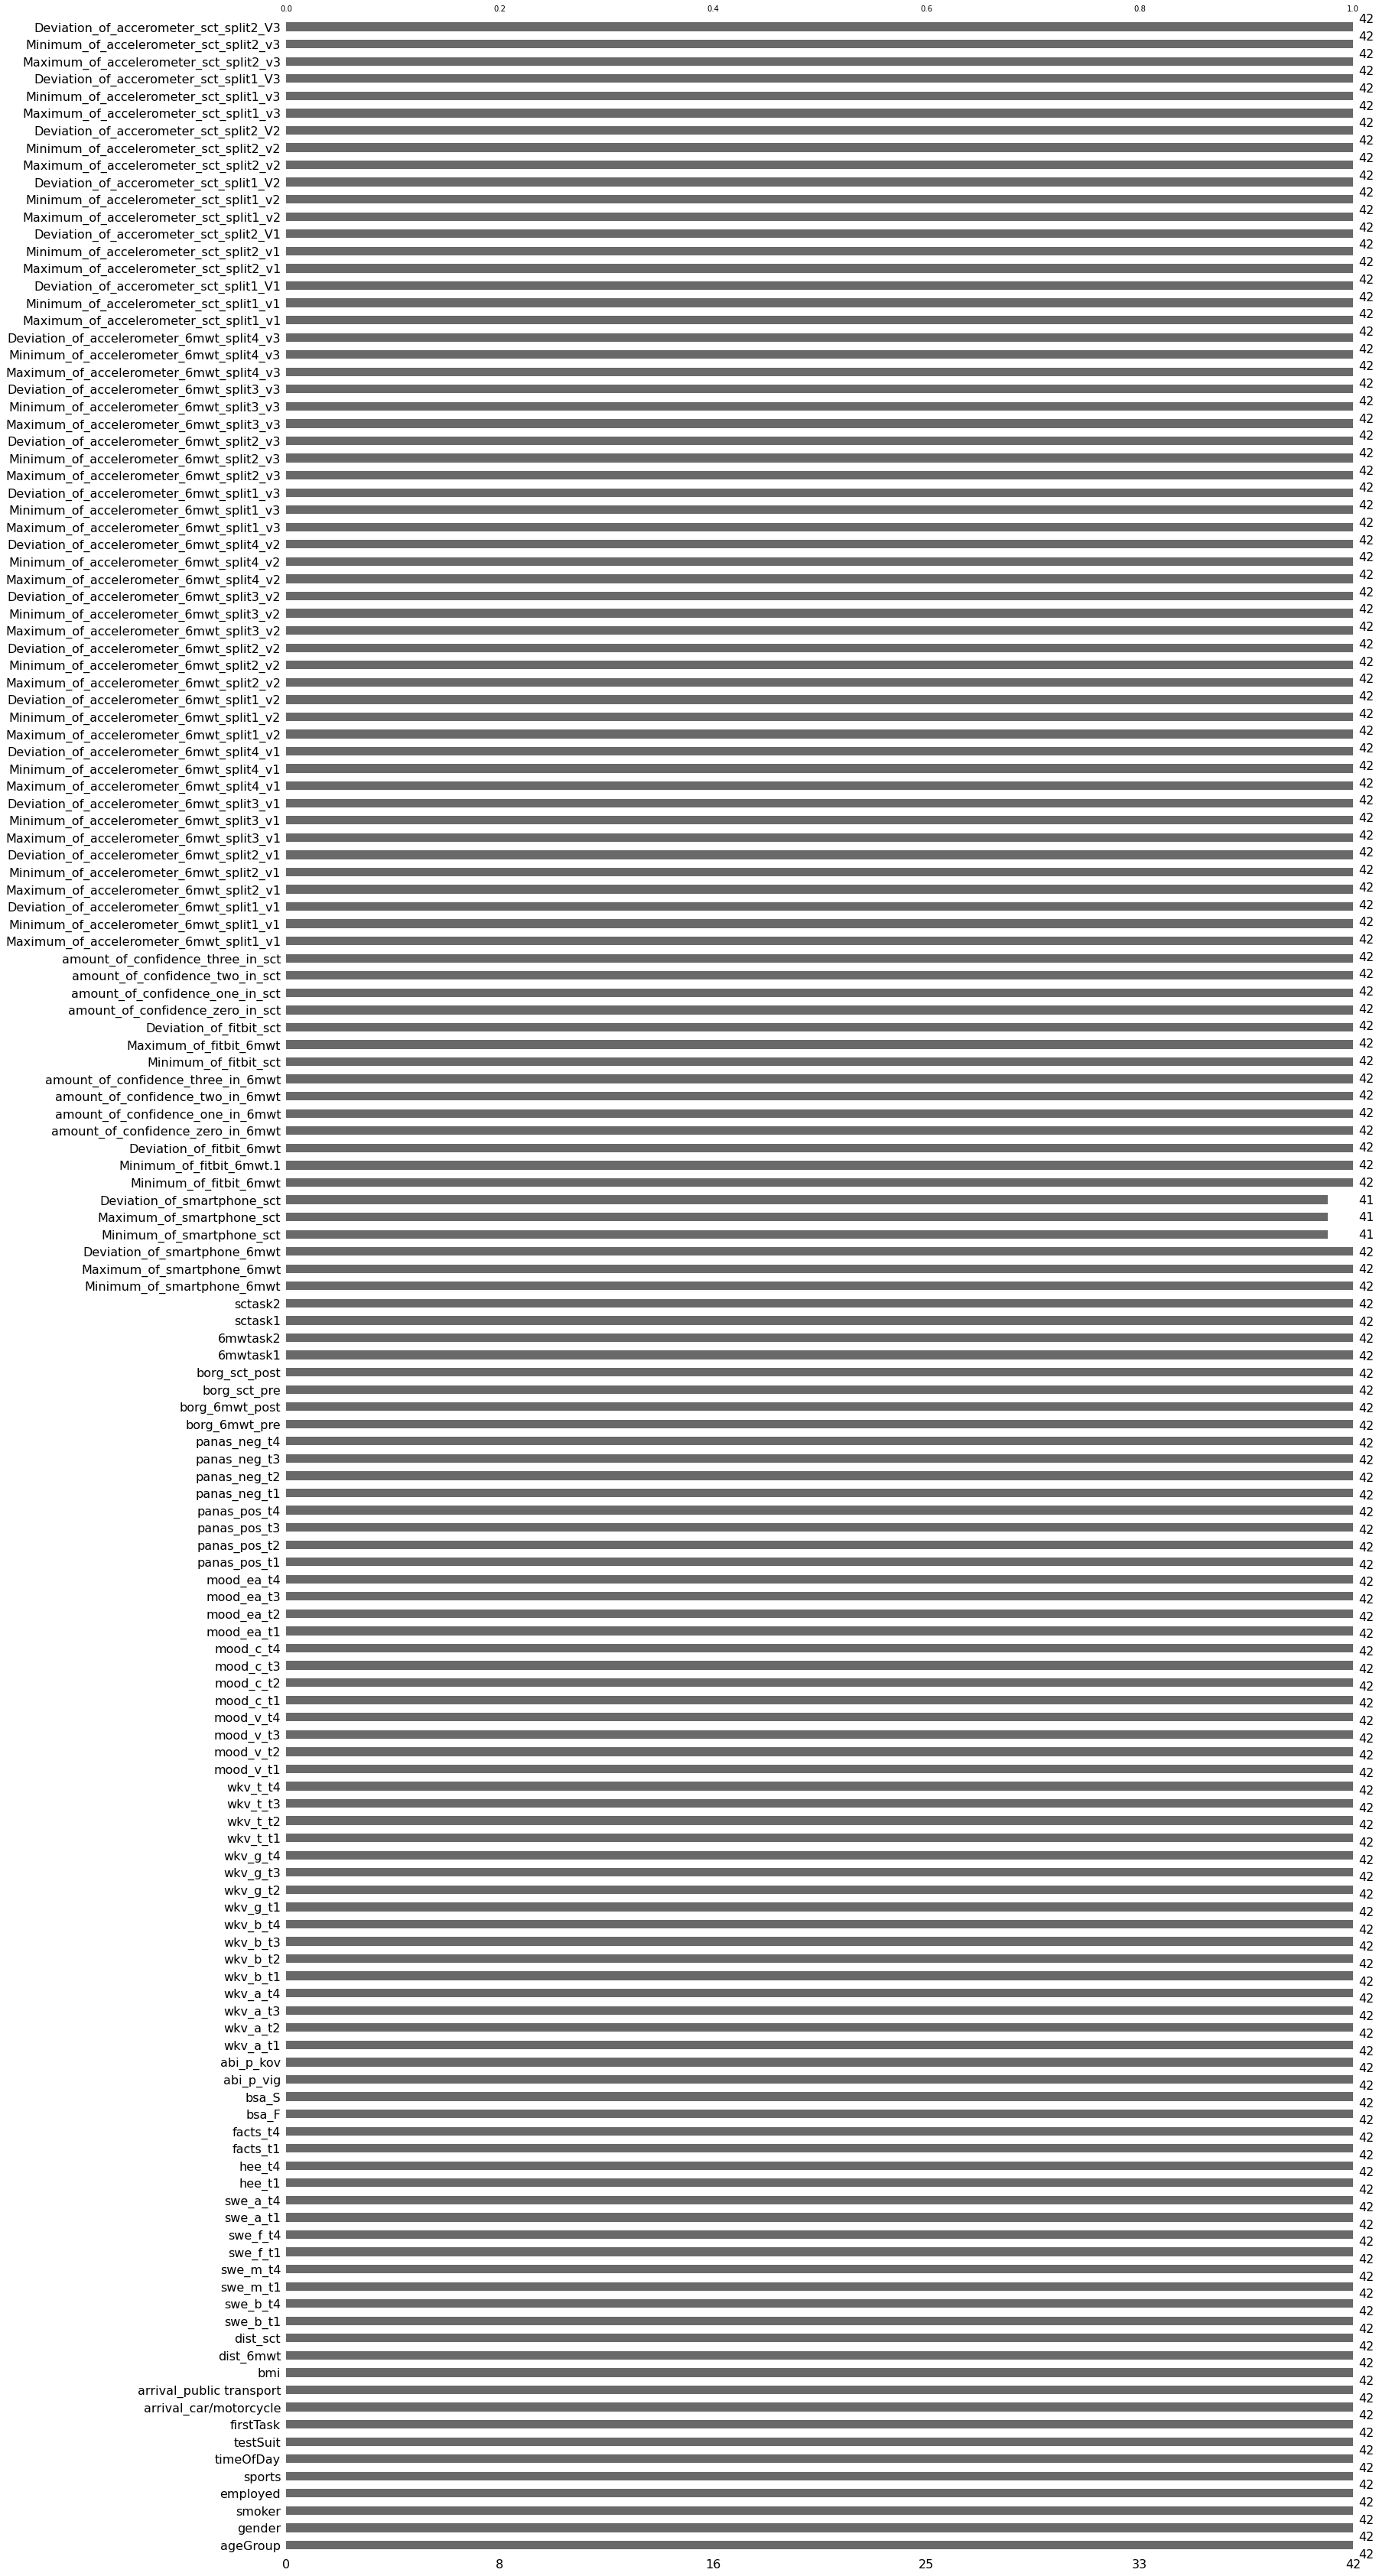

In [93]:
#Explore for NaN
#import missingno as msno

msno.bar(df_final)

In [ ]:
#For now, it's unclear how to proceed with data (what can be removed, reduced further) 
#so let's try dimensionality reduction first: we check PCA, Isomap. 
#We plan to try UMAP later (now technical problems with installation)
#For algorithms we try: k-Means, DBSCAN, BIRCH and Gaussian mixture

In [109]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_final.drop(['Deviation_of_smartphone_sct', 'Maximum_of_smartphone_sct', 'Minimum_of_smartphone_sct'], axis=1))
x_pca = pca.transform(df_final.drop(['Deviation_of_smartphone_sct', 'Maximum_of_smartphone_sct', 'Minimum_of_smartphone_sct'], axis=1))
x_pca.shape
x_pca

df_pca = pd.DataFrame(x_pca,columns=['pca1', 'pca2'])

In [ ]:
#Let's start with k-Means.
#First of all, dedide on quantity of clusters.
#We base our choice on SSE(Elbow method), Silhouhette and Gap statistic method:

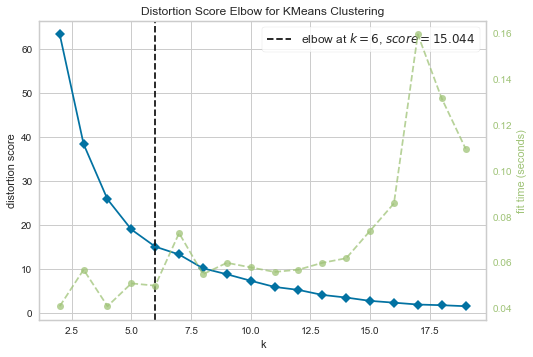

In [110]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(df_pca)        # Fit data to visualizer
visualizer.show() 

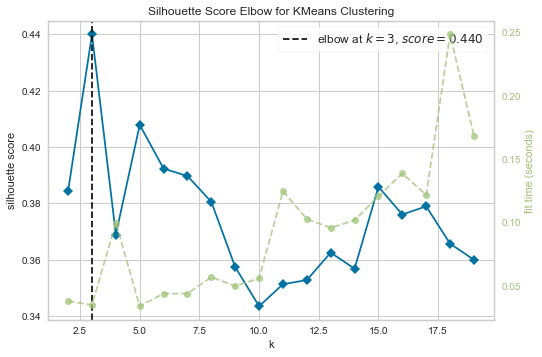

In [111]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

15

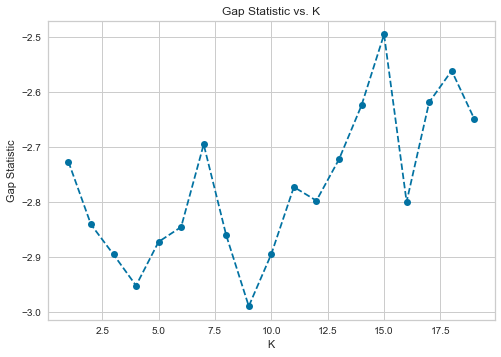

In [112]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(df_pca, nrefs=3, maxClusters=20)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');
score_g

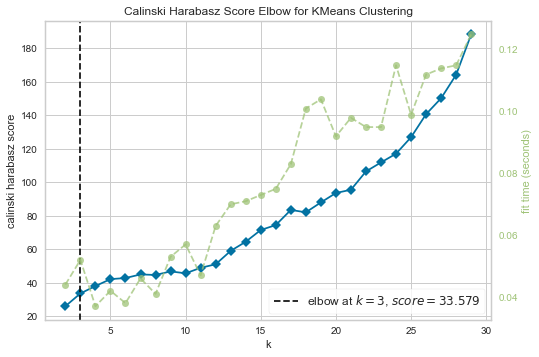

In [113]:
#Silhouhette says k=3, Elbow method says k=6 and Gap says k = 15  
#Let's try another one:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
#Ok, it also says 3 clusters are optimal.
#So let's run with k = 3


Text(0.5, 1.0, 'K-Means on PCA')

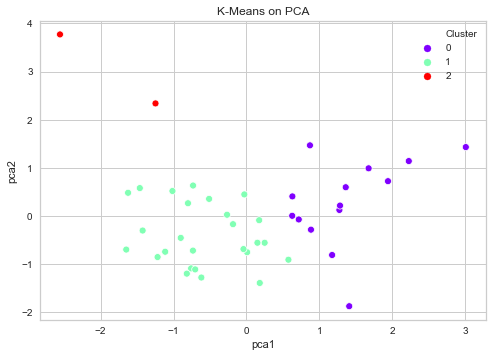

In [118]:
#Apply k-Means (just to compare):
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit(df_pca)
df_pca['Cluster'] = km.labels_
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df_pca, palette = 'rainbow')
ax.set_title('K-Means on PCA')

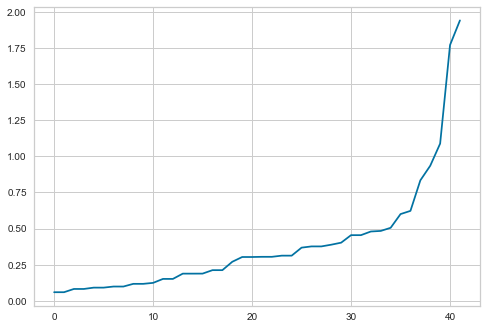

In [131]:
#DBSCAN, let's find appropriate epsilon:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_pca.drop('Cluster', axis = 1))
distances, indices = nbrs.kneighbors(df_pca.drop('Cluster', axis=1))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


Text(0.5, 1.0, 'DBSCAN on PCA')

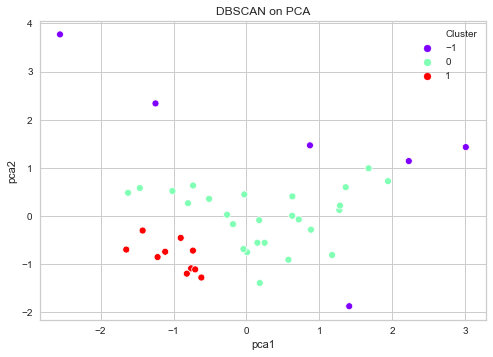

In [137]:
db = DBSCAN(eps=0.625, min_samples=5).fit(df_pca.drop('Cluster', axis = 1))
df_pca['Cluster'] = db.labels_
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df_pca, palette = 'rainbow')
ax.set_title('DBSCAN on PCA')

Text(0.5, 1.0, 'BIRCH on PCA')

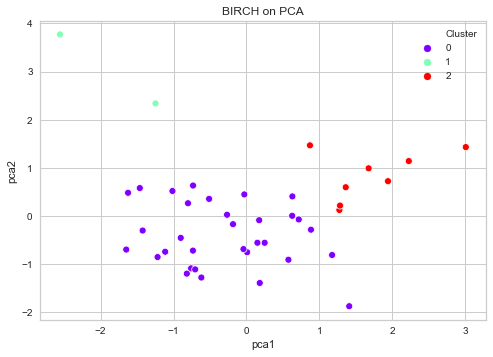

In [138]:
#BIRCH
from sklearn.cluster import Birch
brc = Birch(branching_factor=42, n_clusters=3, threshold=0.5)
brc.fit(df_pca.drop('Cluster', axis = 1))
df_pca['Cluster'] = brc.predict(df_pca.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df_pca, palette = 'rainbow')
ax.set_title('BIRCH on PCA')

In [165]:
#Gaussian misture, let's choose the proper number of clusters:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(df_pca.drop('Cluster', axis = 1))
    df_pca['Cluster'] = gmm.predict(df_pca.drop('Cluster', axis = 1))
    d = metrics.silhouette_score(df_pca.drop('Cluster', axis = 1), df_pca['Cluster'], metric='euclidean')
    print(i, d)

2 0.3185923191007044
3 0.42570683970428425
4 0.35769587892068777
5 0.261862633462493
6 0.38685939844312334
7 0.33091867838965405
8 0.3370806278534508
9 0.3128540440617349
10 0.3098112080970973


Text(0.5, 1.0, 'Gaussian mixture on PCA')

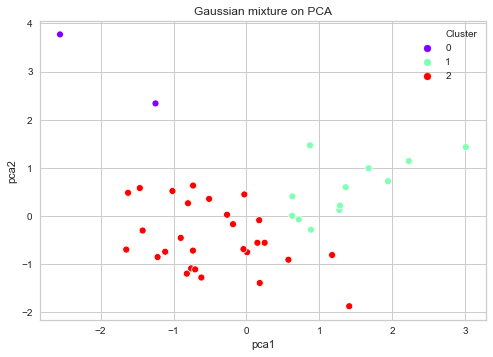

In [166]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df_pca.drop('Cluster', axis = 1))
df_pca['Cluster'] = gmm.predict(df_pca.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'Cluster', data = df_pca, palette = 'rainbow')
ax.set_title('Gaussian mixture on PCA')

In [152]:
#Isomap: non-linear dimensionality reduction
from sklearn import manifold
#just copy of my set for convenience:
df_copy = df_final.copy()
df_copy = df_copy.drop(['Deviation_of_smartphone_sct', 'Maximum_of_smartphone_sct', 'Minimum_of_smartphone_sct'], axis=1)


iso = manifold.Isomap(n_neighbors=5, n_components=2)
iso.fit(df_copy)
manifold_2Da = iso.transform(df_copy)
mani_df = pd.DataFrame(manifold_2Da, columns=['c1', 'c2'])


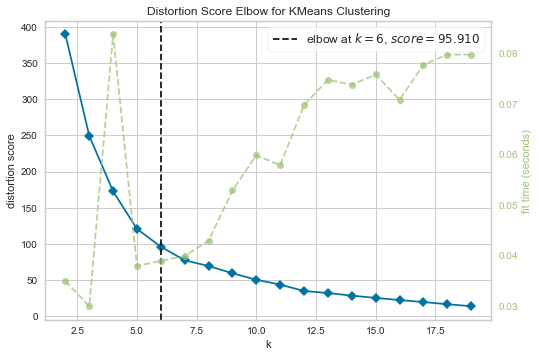

In [153]:
# Elbow Method for K means
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(mani_df)        # Fit data to visualizer
visualizer.show() 

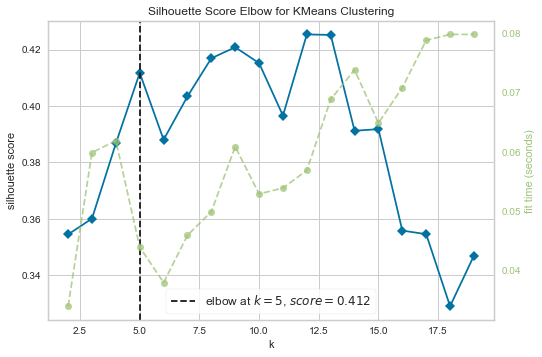

In [154]:
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(mani_df)        # Fit the data to the visualizer
visualizer.show()   

Text(0.5, 1.0, 'K-Means on Isomap')

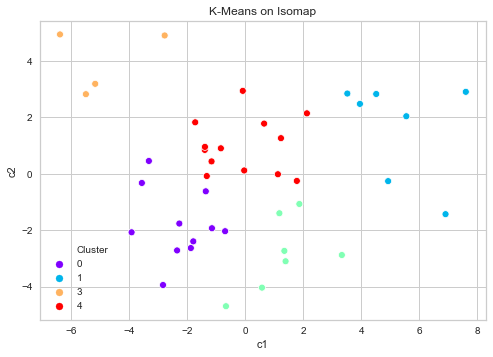

In [155]:
#Apply k-Means (just to compare):
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit(mani_df)
mani_df['Cluster'] = km.labels_
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('K-Means on Isomap')

Text(0.5, 1.0, 'K-Means on Isomap')

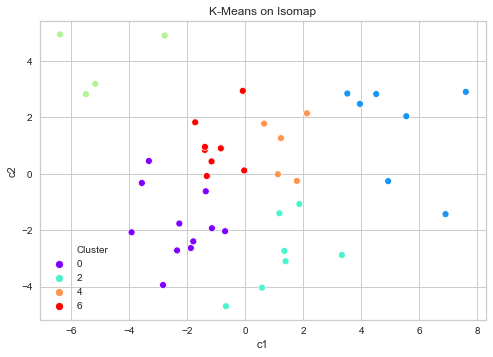

In [156]:
km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit(mani_df)
mani_df['Cluster'] = km.labels_
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('K-Means on Isomap')

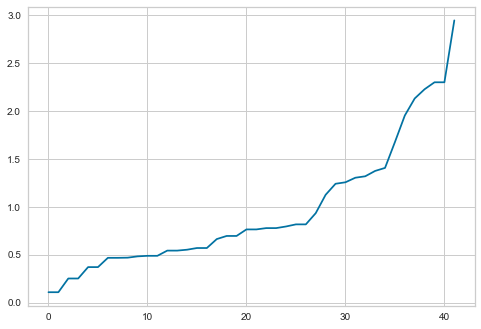

In [157]:
#DBSCAN
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(mani_df.drop('Cluster', axis = 1))
distances, indices = nbrs.kneighbors(mani_df.drop('Cluster', axis=1))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Text(0.5, 1.0, 'DBSCAN on Isomap')

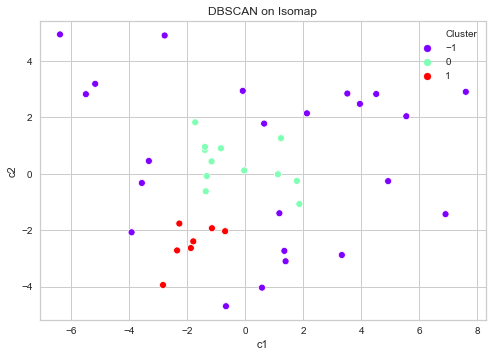

In [162]:
db = DBSCAN(eps=1.35, min_samples=5).fit(mani_df.drop('Cluster', axis = 1))
mani_df['Cluster'] = db.labels_
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('DBSCAN on Isomap')

Text(0.5, 1.0, 'BIRCH on Isomap')

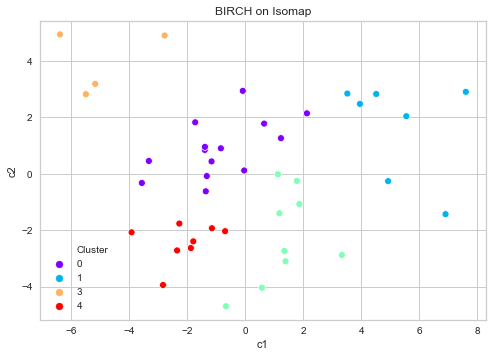

In [163]:
#BIRCH
brc = Birch(branching_factor=42, n_clusters=5, threshold=0.5)
brc.fit(mani_df.drop('Cluster', axis = 1))
mani_df['Cluster'] = brc.predict(mani_df.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('BIRCH on Isomap')

In [167]:
#Gaussian mixture model
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(mani_df.drop('Cluster', axis = 1))
    mani_df['Cluster'] = gmm.predict(mani_df.drop('Cluster', axis = 1))
    d = metrics.silhouette_score(mani_df.drop('Cluster', axis = 1), mani_df['Cluster'], metric='euclidean')
    print(i, d)

2 0.3215236425072127
3 0.39675893821646196
4 0.29998972843403043
5 0.394198281765252
6 0.4001846035297987
7 0.29556141154455
8 0.35495210314993514
9 0.35615676842167476
10 0.32906399095433914


Text(0.5, 1.0, 'Gaussian mixture on Isomap')

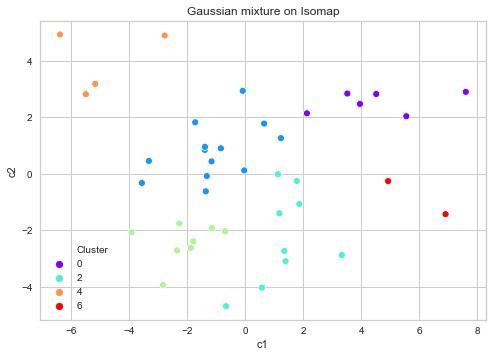

In [169]:
gmm = GaussianMixture(n_components=6)
gmm.fit(mani_df.drop('Cluster', axis = 1))
mani_df['Cluster'] = gmm.predict(mani_df.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='c1', y='c2', hue = 'Cluster', data = mani_df, palette = 'rainbow')
ax.set_title('Gaussian mixture on Isomap')